# 2. Fasea: Algoritmoak diseinatzen

**Julen Etxaniz eta Aitor Zubillaga**

Community Detection proiektuaren 1. fasea entregatu duzue, eta feedback-a jaso ere. Klasean hainbat algoritmo ikusi ditugu, batzuk soluzio bakarrean oinarritutakoak, beste batzuk aldiz, populazio bat erabiltzen dutenak. Horiez gain, hibridatzeko teknikak ere ikusi ditugu. Bigarrengo fase honetan, bi algoritmo diseinatu beharko dituzue, bata soluzio bakarrean oinarritutakoa, eta bestea poblazionala. Ez hori bakarrik, bi algoritmoetako batek operadore probabilistikoak erabili beharko ditu, Estimation of Distribution Algorithms (EDAk) edo Ant Colony Optimization (ACO)-ek egiten duten bezala. Algoritmoen helburua, komunitate kopuru jakin bat emanik, modularity maximizatzen duen komunitate banaketa (soluzioa) bilatzen saiatzea da.

Errepasatu gaitegian zehar ikusi ditugun algoritmo guztiak, eta horiek kontuak izanik, libre zarete nahi dituzuen diseinuak sortzeko, baita ere hibridoak! Adi! Egiten duzuen aukeraketa argudiatu egin beharko duzue.


#### Entregablea

Bigarrengo fasea ebaluatu ahal izateko, notebook honetan bertan algoritmoen diseinua eta implementazioa proposatu beharko duzue. Gogoratu algoritmo bat azaltzeko modurik errezena diagrama bat egitea dela. Adi! Atal bakoitzean hartutako erabakiak eta garatutako metodoak egoki argudiatu beharko dituzue. Ez argudiatzeak edo lana garaiz ez entregatzeak penalizazioa jasoko dute ebaluagarria den proiektuaren zati honetan. eGelan zehazten dira notebook-a igotzeko <b>egun eta orduak</b>.

Momentuz, ez daukazue algoritmoen exekuzio eta konparaketak egin behar. Hirugarren fasean, esperimentazioaren inguruko baldintzak emango dizkizuet, eta, horrez gain, txostenaren idazketa burutu beharko duzue.

## Aukeraketa

Algoritmo hauek diseinatu eta inplementatu ditugu:

1. ILS metodo eraikitzaile estokastiko batekin.

2. UMDA metodo eraikitzaile estokastiko batekin.

Bi algoritmo hauek eskatutako baldintzak betetzen dituzte. Lehenengoa soluzio bakarrean oinarritutakoa da eta bigarrena poblazionala. UMDAk operadore probabilistikoak erabiltzen ditu.

## Grafoa Sortu

Sarrerako kodea erabiliz grafoa sortu eta bistaratuko dugu, ondoren erabili ahal izateko. Grafo horretan, autore bakoitzeko nodo bat izango dugu, eta bi autoreren artean elkarlana egon bada (artikulu bat batera idatzi badute), orduan dagozkien nodoen artean arku bat egongo da. Baina ez da berdina elkarlan bat egitea, edo 100. Horregatik, arkuek pisu bat izango dute, elkarlan kopurua adieraziko duena.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection

/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection


In [ ]:
%cd /content/drive/MyDrive/Proiektua - Community Detection

[Errno 2] No such file or directory: '/content/drive/MyDrive/Proiektua - Community Detection'
/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection


In [ ]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import networkx as nx

# Plot
import matplotlib.pyplot as plt

# Combinations
import itertools

def sortu_grafoa():
    # Get data
    connect = sqlite3.connect('data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Have a look at data
    df.head(10)

    # Initialize graph
    G = nx.Graph()

    # Transform
    # Autorearen IDa erabili beharrean erabili izena.
    for p, a in df.groupby('paper_id')['name']: 
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)
                
    # Print graph size
    print('Autore kopurua grafoan:', G.number_of_nodes())
    print('Elkarlan kopurua grafoan:', G.number_of_edges())
    
    return G

def bistaratu_grafoa(G):
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75', label=True)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

    plt.axis('off')
    plt.show()

In [ ]:
G = sortu_grafoa()

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


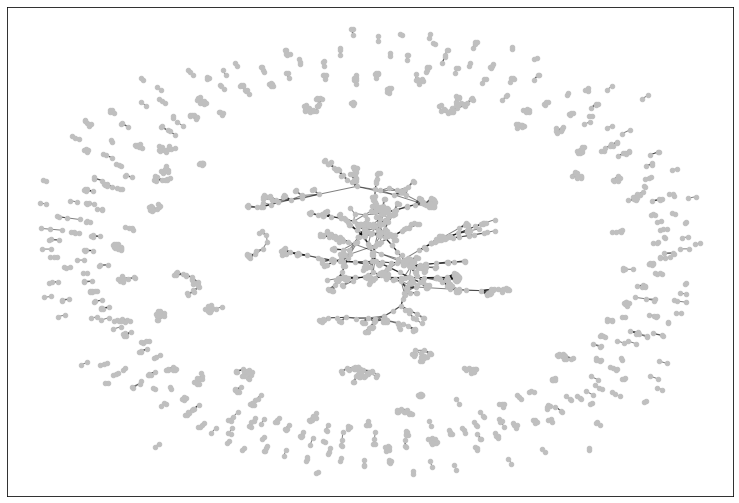

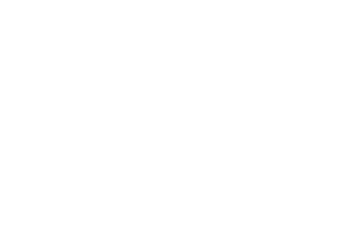

In [ ]:
bistaratu_grafoa(G)

## Helburu-funtzioa

1.fasean definitu genuen helburu funtzioa erabiliko dugu, modularitatea. Modularitateak sare baten komunitate banaketaren egokitasuna neurtzen du. Banaketa egokia izango da komunitateen barruan ertz asko badaude, eta komunitate artean gutxi.

### Sasikodea

> **Input:**
>
> $c$ : the partition of the nodes, a dictionary from nodes to communities
>
> $G$ : the graph, where $N(v)$ are neighbours of $v$ and $A_{vw}$ is the weight of the edge from $v$ to $v$
>    
> **Output:** $Q$ : modularity
>
> 2: $m = \frac{1}{2}\sum_{vw}A_{vw}$
>
> 3: $Q = 0$
>
> 4: **for** $v \in G$ **do**
>
> 5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $i = c_v$
>
> 6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_v = \sum_{w}A_{vw}$
> 
> 7: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $a_i = a_i + k_v$
>
> 8: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **for** $w \in N(v)$ **do**
>
> 9: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $e_{ii} = e_{ii} + A_{vw}\delta(c_v,c_w)$
>
> 10: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **end for**
>
> 11: **end for**
>
> 12: **for** $i \in \{1,...,k\}$ **do**
>
> 13: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q = Q + (e_{ii}/2m - (a_i/2m)^2)$
>
> 14: **end for**

### Kodea

In [ ]:
from collections import defaultdict
def modularity(G, partition, weight='weight'):
    weights = defaultdict(int)
    degrees = defaultdict(int)
    sum = G.size(weight=weight)
    modularity = 0

    for node in G:
        community = partition[node]
        degrees[community] += G.degree(node, weight=weight)
        for neighbour, data in G[node].items():
            if partition[neighbour] == community:
                if neighbour == node: # 4 nodes have self edges
                    weights[community] += data[weight] * 2
                else:
                    weights[community] += data[weight]

    for community in set(partition.values()):
        modularity += (weights[community] / (2 * sum)) - (degrees[community] / (2 * sum)) ** 2
    return modularity

## Random Search

Hasteko, ausazko bilaketa inplementatuko dugu baseline edo oinarri-lerro moduan erabiltzeko. Horrela, inplementatzen ditugun beste algoritmoak konparatu ditzakegu.

In [ ]:
def random_search(G, max_evals, com_count):
    size = G.number_of_nodes()
    best_solution = list(np.random.randint(com_count, size=size))
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    for i in range(max_evals-1):
        solution = list(np.random.randint(com_count, size=size))
        partition = dict(zip(G.nodes, best_solution))
        fitness = modularity(G, best_partition)
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    return (best_fitness, best_solution, max_evals)

## Metodo Eraikitzailea

Bi algoritmoen hasieraketarako metodo eraikitzaile estokastikoa erabili dugu. Jadanik existitzen diren metodoetako batzuk konparatu ditugu. Gure ustez egokiena dena aukeratu dugu eta aldaketa batzuk egin ditugu problema honetara egokitzeko.

### Aukeraketa

Metodoa aukeratzeko CDLib [1] liburutegiko [2] hainbat metodo probatu ditugu. Denbora, modularitatea eta komunitate kopurua kontuan hartu ditugu. Louvain aukeratu dugu modularitate onena lortzen duelako denbora gutxian eta sinplea delako. Leiden azkarragoa da, baina konplexuagoa da eta kodea C++ lengoaian [3] bakarrik aurkitu dugu. Beraz, Louvain moldatzea errazagoa izango da.

[1] Rossetti, G., Milli, L. & Cazabet, R. [CDLIB: a python library to extract, compare and evaluate communities from complex networks](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0165-9
). Appl Netw Sci 4, 52 (2019).

[2] CDlib - Community Discovery Library https://cdlib.readthedocs.io/en/latest/

[3] Implementation of the Leiden algorithm for various quality functions to be used with igraph in Python https://github.com/vtraag/leidenalg

In [ ]:
!pip install cdlib
!pip install python-igraph
!pip install leidenalg
from cdlib import algorithms
from timeit import default_timer

In [ ]:
def test_algorithm(method, **kwargs):
    start = default_timer()
    com = method(G, **kwargs)
    end = default_timer()
    partition = {key: value[0] for key, value in com.to_node_community_map().items()}
    com_count = len(set(list(partition.values())))
    print("Denbora:", end - start)
    print("Modularitatea:", com.newman_girvan_modularity().score)
    print("Komunitateak:", com_count)

#### Louvain

[1] Blondel, Vincent D., et al. [Fast unfolding of communities in large networks](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008). Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.


<figure>
    <img src='https://drive.google.com/uc?export=view&id=1Io2J3mHJ-mFTYVk0XDMkbeBsfpcrStOf' alt='Louvain' />
    <figcaption><b>1. Irudia.</b> Algoritmoaren pausuen ikustaratzea. Iterazio bakoitzak bi fase ditu: batean komunitateen aldaketa lokala bakarrik baimenduta modularitatea optimizatzen saiatzen da eta bestean, aurkitutako komunitateak agregatzen dira komunitateen sare berri bat sortzeko. Iterazio hauek modularitatea hobetzea posible ez den arte errepikatzen dira.</figcaption>
</figure>

In [ ]:
test_algorithm(algorithms.louvain)

Denbora: 0.27107292400000915
Modularitatea: 0.9722637390442146
Komunitateak: 291


#### Leiden

[1] Traag, V.A., Waltman, L. & van Eck, N.J. [From Louvain to Leiden: guaranteeing well-connected communities](https://www.nature.com/articles/s41598-019-41695-z). Sci Rep 9, 5233 (2019).

<figure>
    <img src='https://drive.google.com/uc?export=view&id=1KotmWxIHsHW57-Nx6muiFtSYh4-wlUXR' alt='Leiden' />
    <figcaption><b>2. Irudia</b> Leiden algoritmoa. Leiden algoritmoa partizio batetik hasten da (a). Algoritmoak nodo indibidualak komunitate batetik beste batera mugitzen ditu partizio bat aurkitzeko (b) eta hau, ondoren honetu egiten da (c). Sare agregatu bat (d) sortzen da hobetutako partizioan, hobetu gabeko partizioa erabilita sare agregatuaren hasierako partizioa sortzeko. Adibidez, komunitate gorria (b), 2 azpikomunitatera banatzen da (c). Agregazioaren ondoren bi nodotan banatzen da hau (d), biak komunitate berdinaren parte izaten. Algoritmoak ondoren sare agregatuko (e) nodo indibidualak mugitzen ditu. Kasu honetan, hobekuntzak ez du partizioa aldatzen (f). Pausu hauek errepikatu egiten dira hobekuntzan gehiago egin ezin daitekeen arte.</figcaption>
</figure>

In [ ]:
test_algorithm(algorithms.leiden)

Denbora: 0.05114576999994824
Modularitatea: 0.9703494703009221
Komunitateak: 291


### Inplementazioa

Metodo eraikitzaile estokastikoa inplementatzeko Louvain Heuristikoan oinarritu gara [1].  Community liburutegiko [2] inplementazioa hartu dugu GitHub-etik [3] eta hainbat funtzio moldatu ditugu gure beharretara.

[1] Blondel, Vincent D., et al. [Fast unfolding of communities in large networks. Journal of statistical mechanics](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008): theory and experiment 2008.10 (2008): P10008.

[2] Community detection for NetworkX’s documentation https://python-louvain.readthedocs.io/en/latest/

[3] Louvain Community Detection https://github.com/taynaud/python-louvain

#### Status

Community moduluak Status klaseako objektuak erabiltzen ditu kalkuluak egiterakoan egoera gerdetzeko. Honekin algoritmoa azkarragoa izatea lortzen da. Atal honetan aldaketa txikiak bakarrik egin ditugu. Adibidez, `dict([])` ordez `defaultdict(int)` erabili dugu adierazpen batzuk sinplifikatzeko.

In [ ]:
class Status(object):
    """
    To handle several data in one struct.
    Could be replaced by named tuple, but don't want to depend on python 2.6
    """
    node2com = {}
    total_weight = 0
    internals = {}
    degrees = {}
    gdegrees = {}

    def __init__(self):
        self.node2com = defaultdict(int)
        self.total_weight = 0
        self.degrees = defaultdict(int)
        self.gdegrees = defaultdict(int)
        self.internals = defaultdict(int)
        self.loops = defaultdict(int)

    def __str__(self):
        return ("node2com : " + str(self.node2com) + " degrees : "
                + str(self.degrees) + " internals : " + str(self.internals)
                + " total_weight : " + str(self.total_weight))

    def copy(self):
        """Perform a deep copy of status"""
        new_status = Status()
        new_status.node2com = self.node2com.copy()
        new_status.internals = self.internals.copy()
        new_status.degrees = self.degrees.copy()
        new_status.gdegrees = self.gdegrees.copy()
        new_status.total_weight = self.total_weight

    def init(self, graph, weight, part=None):
        """Initialize the status of a graph with every node in one community"""
        count = 0
        self.node2com = defaultdict(int)
        self.total_weight = 0
        self.degrees = defaultdict(int)
        self.gdegrees = defaultdict(int)
        self.internals = defaultdict(int)
        self.total_weight = graph.size(weight=weight)
        if part is None:
            for node in graph.nodes():
                self.node2com[node] = count
                deg = float(graph.degree(node, weight=weight))
                if deg < 0:
                    error = "Bad node degree ({})".format(deg)
                    raise ValueError(error)
                self.degrees[count] = deg
                self.gdegrees[node] = deg
                edge_data = graph.get_edge_data(node, node, default={weight: 0})
                self.loops[node] = float(edge_data.get(weight, 1))
                self.internals[count] = self.loops[node]
                count += 1
        else:
            for node in graph.nodes():
                com = part[node]
                self.node2com[node] = com
                deg = float(graph.degree(node, weight=weight))
                self.degrees[com] += deg
                self.gdegrees[node] = deg
                inc = 0.
                for neighbor, datas in graph[node].items():
                    edge_weight = datas[weight]
                    if edge_weight <= 0:
                        error = "Bad graph type ({})".format(type(graph))
                        raise ValueError(error)
                    if part[neighbor] == com:
                        if neighbor == node:
                            inc += float(edge_weight) * 2
                        else:
                            inc += float(edge_weight)
                self.internals[com] += inc

#### Louvain

Community moduluak Louvain algoritmoa erabiltzen du partizio onena kalkulatzeko, hau da, modularitate maximoa duena. Lehen esan dugun bezala aldaketa batzuk egin ditugu problemara egokitzeko. Inplementazioaren ondoren konparatuko ditugu jatorrizkoa algoritmoa eta moldatua.

In [ ]:
import numbers
import networkx as nx
import numpy as np


def check_random_state(seed):
    """Turn seed into a np.random.RandomState instance.
    Parameters
    ----------
    seed : None | int | instance of RandomState
        If seed is None, return the RandomState singleton used by np.random.
        If seed is an int, return a new RandomState instance seeded with seed.
        If seed is already a RandomState instance, return it.
        Otherwise raise ValueError.
    """
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, (numbers.Integral, np.integer)):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError("%r cannot be used to seed a numpy.random.RandomState"
                     " instance" % seed)


def partition_at_level(dendrogram, level):
    """Return the partition of the nodes at the given level
    A dendrogram is a tree and each level is a partition of the graph nodes.
    Level 0 is the first partition, which contains the smallest communities,
    and the best is len(dendrogram) - 1.
    The higher the level is, the bigger are the communities
    Parameters
    ----------
    dendrogram : list of dict
       a list of partitions, ie dictionnaries where keys of the i+1 are the
       values of the i.
    level : int
       the level which belongs to [0..len(dendrogram)-1]
    Returns
    -------
    partition : dictionnary
       A dictionary where keys are the nodes and the values are the set it
       belongs to
    """
    partition = dendrogram[0].copy()
    for index in range(1, level + 1):
        for node, community in partition.items():
            partition[node] = dendrogram[index][community]
    return partition


def best_partition(graph, com_count, level=3, min=0.0000001, partition=None, weight='weight', resolution=1., random_state=None):
    """Compute the partition of the graph nodes which maximises the modularity
    (or try..) using the Louvain heuristices
    This is the partition of highest modularity, i.e. the highest partition
    of the dendrogram generated by the Louvain algorithm.
    Parameters
    ----------
    graph : networkx.Graph
       the networkx graph which is decomposed
    com_count : int
       the number of communities
    level : int, optional
       the maximum level of the dendogram
    min : float, optional
       the minimum modularity improvement
    partition : dict, optional
       the algorithm will start using this partition of the nodes.
       It's a dictionary where keys are their nodes and values the communities
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    resolution :  double, optional
        Will change the size of the communities, default to 1.
        represents the time described in
        "Laplacian Dynamics and Multiscale Modular Structure in Networks",
        R. Lambiotte, J.-C. Delvenne, M. Barahona
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    Returns
    -------
    partition : dictionary
       The partition, with communities numbered from 0 to number of communities
    """
    dendo = generate_dendrogram(graph, com_count, level, min, partition, weight, resolution, random_state)
    return partition_at_level(dendo, len(dendo) - 1)


def best_fixed_partition(graph, com_count, level=3, min=0.0000001, partition=None, weight='weight', resolution=1., random_state=None):
    """Compute the partition of the graph nodes which maximises the modularity
    (or try..) using the Louvain heuristices
    This is the partition of highest modularity, i.e. the highest partition
    of the dendrogram generated by the Louvain algorithm.
    Parameters
    ----------
    graph : networkx.Graph
       the networkx graph which is decomposed
    com_count : int
       the number of communities
    level : int, optional
       the maximum level of the dendogram
    min : float, optional
       the minimum modularity improvement
    partition : dict, optional
       the algorithm will start using this partition of the nodes.
       It's a dictionary where keys are their nodes and values the communities
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    resolution :  double, optional
        Will change the size of the communities, default to 1.
        represents the time described in
        "Laplacian Dynamics and Multiscale Modular Structure in Networks",
        R. Lambiotte, J.-C. Delvenne, M. Barahona
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    Returns
    -------
    partition : dictionary
       The partition, with communities numbered from 0 to number of communities
    """
    original_partition = best_partition(graph, com_count, level, min, partition, weight, resolution, random_state)
    count = len(set(original_partition.values()))
    count_list=[]
    for i in range(count):
        count_list.append(list(original_partition.values()).count(i));
    indices = sorted(range(len(count_list)), key=lambda k: count_list[k])
    split = count-com_count
    indices = indices[:split]
    best_modul = 0
    if com_count < count:
        '''com_values = random.sample(range(count), com_count)'''
        com_values = list(range(com_count))
        com_values = list(set(original_partition.values()) - set(indices))
        for i in com_values:
            partition = original_partition.copy()
            for key, value in partition.items():
                if value not in com_values:
                    partition[key] = i
            modul = modularity(graph, partition)
            if modul > best_modul:
                best_modul = modul
                best_part = partition.copy()
    best_part = __renumber(best_part)
    return best_part


def generate_dendrogram(graph, com_count, level=3, min=0.0000001, part_init=None, weight='weight', resolution=1., random_state=None):
    """Find communities in the graph and return the associated dendrogram
    A dendrogram is a tree and each level is a partition of the graph nodes.
    Level 0 is the first partition, which contains the smallest communities,
    and the best is len(dendrogram) - 1. The higher the level is, the bigger
    are the communities
    Parameters
    ----------
    graph : networkx.Graph
        the networkx graph which will be decomposed
    com_count : int
       the number of communities
    level : int, optional
       the maximum level of the dendogram
    min : float, optional
       the minimum modularity improvement
    part_init : dict, optional
        the algorithm will start using this partition of the nodes. It's a
        dictionary where keys are their nodes and values the communities
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    resolution :  double, optional
        Will change the size of the communities, default to 1.
        represents the time described in
        "Laplacian Dynamics and Multiscale Modular Structure in Networks",
        R. Lambiotte, J.-C. Delvenne, M. Barahona
    Returns
    -------
    dendrogram : list of dictionaries
        a list of partitions, ie dictionnaries where keys of the i+1 are the
        values of the i. and where keys of the first are the nodes of graph
    """
    random_state = check_random_state(random_state)

    current_graph = graph.copy()
    status = Status()
    status.init(current_graph, weight, part_init)
    status_list = list()
    lvl = 0
    unique_values = set()
    while lvl <= level and len(unique_values) != com_count:
        __one_level(current_graph, com_count, min, status, weight, resolution, random_state)
        partition = __renumber(status.node2com)
        unique_values = set(partition.values())
        status_list.append(partition)
        current_graph = induced_graph(partition, current_graph, weight)
        status.init(current_graph, weight)
        lvl += 1
    return status_list[:]


def induced_graph(partition, graph, weight="weight"):
    """Produce the graph where nodes are the communities
    there is a link of weight w between communities if the sum of the weights
    of the links between their elements is w
    Parameters
    ----------
    partition : dict
       a dictionary where keys are graph nodes and  values the part the node
       belongs to
    graph : networkx.Graph
        the initial graph
    weight : str, optional
        the key in graph to use as weight. Default to 'weight'
    Returns
    -------
    g : networkx.Graph
       a networkx graph where nodes are the parts
    """
    ret = nx.Graph()
    ret.add_nodes_from(partition.values())

    for node1, node2, datas in graph.edges(data=True):
        edge_weight = datas[weight]
        com1 = partition[node1]
        com2 = partition[node2]
        w_prec = ret.get_edge_data(com1, com2, {weight: 0}).get(weight, 1)
        ret.add_edge(com1, com2, **{weight: w_prec + edge_weight})

    return ret


def __renumber(dictionary):
    """Renumber the values of the dictionary from 0 to n
    """
    values = np.array(list(dictionary.values()))
    values += len(values) + 1
    search_list = []
    solution_list = np.zeros((len(values) + 1), dtype=int)
    n = 0
    for val in values:
        if val not in search_list:
            index_list = [i for i, e in enumerate(values) if e == val]
            for j in index_list:
                solution_list[j] = n
            search_list.append(val)
            n += 1
    ret = dict(zip(dictionary.keys(), solution_list))
    return ret


def __one_level(graph, com_count, min, status, weight_key, resolution, random_state):
    """Compute one level of communities
    """
    modified = True
    cur_mod = __modularity(status, resolution)
    new_mod = cur_mod
    while modified and len(status.node2com) != com_count:
        cur_mod = new_mod
        modified = False
        for node in __randomize(graph.nodes(), random_state):
            com_node = status.node2com[node]
            degc_totw = status.gdegrees.get(node, 0.) / (status.total_weight * 2.)
            neigh_communities = __neighcom(node, graph, status, weight_key)
            remove_cost = - resolution * neigh_communities.get(com_node,0) + \
                (status.degrees.get(com_node, 0.) - status.gdegrees.get(node, 0.)) * degc_totw
            __remove(node, com_node,
                     neigh_communities.get(com_node, 0.), status)
            best_com = com_node
            best_increase = float('-inf')
            for com, dnc in __randomize(neigh_communities.items(), random_state):
                incr = remove_cost + resolution * dnc - status.degrees[com] * degc_totw
                if incr > best_increase:
                    best_increase = incr
                    best_com = com
            __insert(node, best_com, neigh_communities[best_com], status)
            if best_com != com_node:
                modified = True
                if len(status.node2com) == com_count:
                    break
        new_mod = __modularity(status, resolution)
        if new_mod - cur_mod < min :
            break


def __neighcom(node, graph, status, weight_key):
    """
    Compute the communities in the neighborhood of node in the graph given
    with the decomposition node2com
    """
    weights = defaultdict(int)
    for neighbor, datas in graph[node].items():
        if neighbor != node:
            neighborcom = status.node2com[neighbor]
            weights[neighborcom] += datas[weight_key]
    return weights


def __remove(node, com, weight, status):
    """ Remove node from community com and modify status"""
    status.degrees[com] -= status.gdegrees[node]
    status.internals[com] -= weight + status.loops[node]
    status.node2com[node] = -1


def __insert(node, com, weight, status):
    """ Insert node into community and modify status"""
    status.node2com[node] = com
    status.degrees[com] += status.gdegrees[node]
    status.internals[com] += weight + status.loops[node]


def __modularity(status, resolution):
    """
    Fast compute the modularity of the partition of the graph using
    status precomputed
    """
    links = float(status.total_weight)
    result = 0.
    for community in set(status.node2com.values()):
        in_degree = status.internals[community]
        degree = status.degrees[community]
        if links > 0:
            result += in_degree * resolution / (2 * links) -  ((degree / (2. * links)) ** 2)
    return result


def __randomize(items, random_state):
    """Returns a List containing a random permutation of items"""
    randomized_items = list(items)
    random_state.shuffle(randomized_items)
    return randomized_items

### Konparazioa

Gure inplementazioa eta emaitzak community modulukoarekin konparatzen ditugu, egindako aldaketak hobeto ulertu ahal izateko.

#### Renumber

Renumber metodo originalak komunitateen balioak berrizendatzen zituen, komunitateen balioak 0tik komunitate kopurua - 1 era berrizendatuz. Hau da, grafo batek 5 nodo eta 3 komunitate izan ezkero, `[1,1,4,5,5]` soluzioa,`[1,1,0,2,2]` ra berrizendatzen zuen. Guk hau aldatu egin dugu inplementatu behar genuen EDAn pentsatuz. Adibidez, `[1,1,2,0,0]` soluzioa eta `[2,2,0,1,1]` soluzioak komunitaeen banaketa berdina errepresentatzen dute, (lehen bi nodoak eta azken biak batera, erdikoa bakarrik) baina eredua kalkulatzeko ez luke balioko. Beraz, renumber metodoa aldatu dugu, komunitateak txikienetik handira ordenatuak izan daitezen. Goiko kasuan, bi soluzioak `[0,0,1,2,2]` bezala berrizendatuko lirateke.

#### Random State

Ausazko egoera hasieratzen dugu emaitzak erreproduzitu ahal izateko.

In [ ]:
import random
import numpy as np
random.seed(0)
np.random.seed(0)
rs = np.random.RandomState(0)

#### Generate Dendogram

Community moduluko `generate_dendogram` funtzioak komunitateak elkartzen ditu bakarrik hobetzen bada. Beraz, komunitate kopuru optimora iritsitakoan gelditu egiten da. Guri interesatzen zaigu emandako komunitate kopurua izatea, ez optimoa. 

Beraz, helburuko komunitate kopurura iritsitakoan algoritmoa geratzen dugu. Gainera, aldaketa batzuk egin ditugu komunitate kopurua gehiago jaitsi ahal izateko modularitatea asko txartu gabe. Horrela, `292` komunitate ingurutik `279` komunitate ingurura jaistea lortzen dugu.

Hala ere, honek ez du balio emandako komunitate kopurua `279` baino txikiagoa bada. Izan ere, komunitateen artean ertzik ez dagoenean algoritmoa geratu egiten da. Hurrengo atalean komentatuko dugu nola lortu dugun txikitzea.

In [ ]:
def print_levels(dendo):
    for level in range(len(dendo)):
        partition = partition_at_level(dendo, level)
        com_count = len(set(partition.values()))
        modul = modularity(G, partition)
        print("level", level, "com_count", com_count, "modularity", modul)

In [ ]:
dendo = community.generate_dendrogram(G, random_state=rs)
print_levels(dendo)

level 0 com_count 503 modularity 0.814817157627604
level 1 com_count 313 modularity 0.959961520117186
level 2 com_count 291 modularity 0.9722637390442148


In [ ]:
dendo = generate_dendrogram(G, 50, random_state=rs)
print_levels(dendo)

level 0 com_count 501 modularity 0.8173900564269182
level 1 com_count 310 modularity 0.9620794909841452
level 2 com_count 286 modularity 0.9692243480796483
level 3 com_count 279 modularity 0.9588916855535491


#### Best Partition

Community moduluko `best_partition` edo gurea erabiltzen badugu antzeko arazoa daukagu, komunitate kopurua ezin da nahi adina jaitsi. Hori konpontzeko, `best_fixed_partition` funtzioa inplementatu dugu. Honek, lehenengo aurreko funtzioari deituko dio. Gero, soberan geratzen diren komunitate txikienak hartu eta guztiak komunitate berean elkartuko ditu. Izan ere, komunitateen artean konexiorik ez dagoenean, modularitate hobea lortzeko modurik onena komunitate txikienak elkartzea da, komunitate handiak eragin handiago baitute modularitatean eta hauek txartzeak beraz, asko jaisten du fitnessa. Komunitate txikienak non elkartu aukeratzeko, aukera guztiak aztertu eta onena aukeratzen da.

Funtzio hauei 3 parametro gehitu dizkiegu: `com_count`, `level` eta `min`. Hauekin komunitate kopurua, dendogramaren maila maximoa eta modularitatearen hobekuntza minimoa kontrola daiteke. Ikus daiteke komunitate kopurua nahi adina gutxitu daitekeela, eta modularitatea ez dela horrenbeste jaisten.

In [ ]:
def print_partition(partition):
    com_count = len(set(partition.values()))
    modul = modul = modularity(G, partition)
    print("com_count", com_count, "modularity", modul)

In [ ]:
best_part_com = community.best_partition(G, random_state=rs)
print_partition(best_part_com)

com_count 292 modularity 0.9722795530305457


In [ ]:
best_part = best_partition(G, 50, random_state=rs)
print_partition(best_part)

com_count 279 modularity 0.95437926466843


In [ ]:
best_fixed_part = best_fixed_partition(G, 50, random_state=rs)
print_partition(best_fixed_part)

com_count 50 modularity 0.9052468027960763


#### Induced Graph

Aurreko partizioak grafo moduan bistaratu ditzakegu aldea hobeto ikusteko.

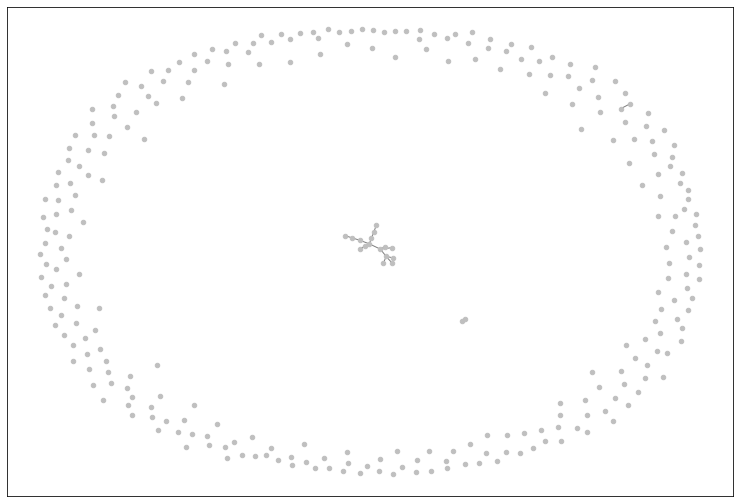

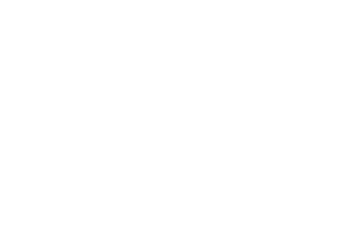

In [ ]:
graph_com = community.induced_graph(best_part_com, G)
bistaratu_grafoa(graph_com)

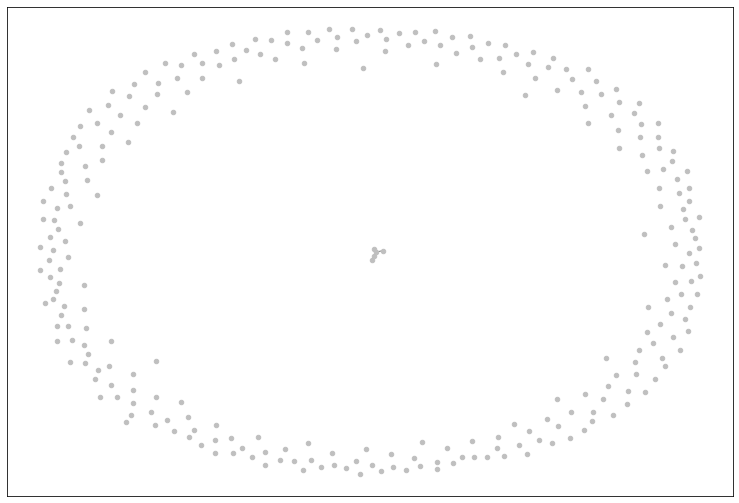

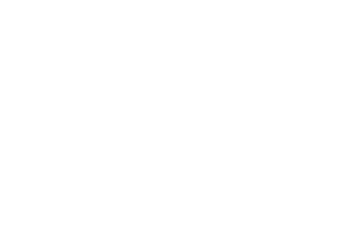

In [ ]:
graph = induced_graph(best_part, G)
bistaratu_grafoa(graph)

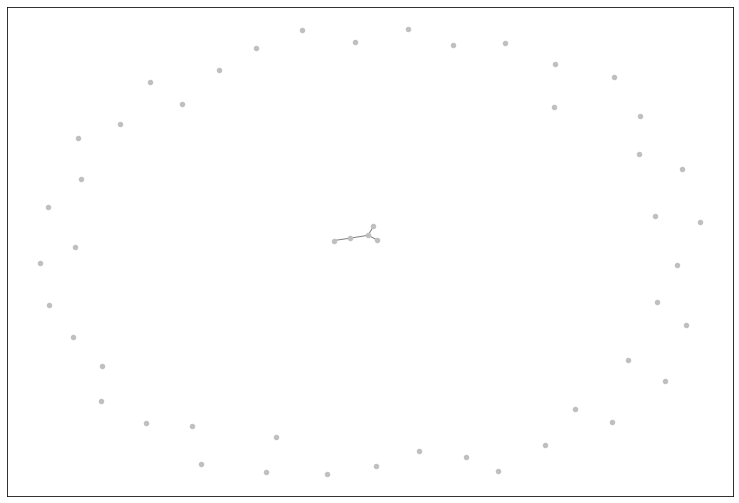

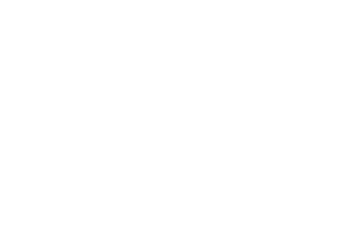

In [ ]:
graph_fixed = induced_graph(best_fixed_part, G)
bistaratu_grafoa(graph_fixed)

## 1. ILS

Iterated Local Serach aujeratu dugu soluzio bakarreko algoritmo bezala [1][2].

Iterated Local Search exekutatzeko lehenik parametroak aukeratu behar ditugu:

* `G`: grafoa
* `max_evals`: ebaluatu ditzazkegun soluzio kopurua.
* `com_count`: komunitate kopurua.
* `grade`: perturbazio maila.
* `temp_initial`: hasierako tenperatura Simulated Annealing algoritmoarentzat.
* `tem_update`: tenperatura eguneratzeko portzentaia.

Hasierako soluzioa sortzeko Louvain eraikitzailea erabiltzen da. Ondoren perturbazioak sartu eta bilaketa lokalak egiten dira horien gainean amaierako baldintzara iritsi arte.

Perturbazioak sortzeko `perturbate_solution` funtzioa erabili dugu. Funtzio honek perturbatu beharreko soluzioa, komunitate kopurua eta perturbazioaren gradua hartzen ditu. Perturbatzeko, lehenik, soluzioan 2 komunitate ausaz hartu eta elkartu egiten dira, eta ondoren komunitate bat ausaz hartu eta bi zatitan banatzen da. Zati hauek ausaz aukeratzen dira. Funtzioak jasotako graduak, soluzioa zenbat aldiz perturbatuko (merge + split) den zehazten du. Behin perturbazioa sortuta, soluzio honen optimo lokala aurkituko da best first estrategia eta Swap ingurune funtzioa erabiliz. Emaitza eguneratzeko Simulated Annealing estrategia erabiliko dugu, emaitza txarragoak onartu ahal izateko. Gero eta tenperatura handiagoarekin hasieratu, orduan eta probabilitate gehiago egongo da emaitza txarrak onartzekoak.

[1] Liu, C., Kang, Q., Kong, H., Li, W., & Kang, Y. (2020). [An iterated local search algorithm for community detection in complex networks](https://www.worldscientific.com/doi/abs/10.1142/S0217979220500137). International Journal of Modern Physics B, 34(04), 2050013.

[2] Li, W., Kang, Q., Kong, H., Liu, C., & Kang, Y. (2020). [A novel iterated greedy algorithm for detecting communities in complex network](https://link.springer.com/content/pdf/10.1007/s13278-020-00641-y.pdf). Social Network Analysis and Mining, 10, 1-17.

### Diseinua

#### ILS

<figure>
    <img src='https://drive.google.com/uc?export=view&id=1ItmPvyTUC_ThfOqLzg4mj8MzFG7RsTXU' alt='GA' />
    <figcaption><b>1. Irudia.</b> ILS. Iterated Local Search.</figcaption>
</figure>

### Sasikodea

#### LS

Local Search

> **Input:** $f$ helburu-funtzioa, $s_0$ hasierako soluzioa eta
>
> $N$ ingurune funtzioa
> 
> **Output:** $s^*$ soluzioa
> 
> 1: $s^* = s_0$
> 
> 2: **repeat**
> 
> 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $H = \{s^´ \in N(s^*) | f(s^´) > f(^*)\}$
>
> 4: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **if** $|H|>0$ **then**
>
> 5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Aukeratu $H$-n dagoen soluzio bat $s^´$
>
> 6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s^* = s^´$
>
> 7: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **end**
>
> 8: **until** $s^*$ aldatu da

#### ILS

Iterated Local Search

> **Input:** $local\_search$ bilaketa algoritmoa, $perturbation$ perturbazioa 
>
> $simmulated\_annealing$ onarpen-baldintza eta $stop\_criterion$ gelditzeko irizpidea
> 
> **Output:** $s^*$ soluzioa
> 
> 1: **repeat**
> 
> 2: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s^* = perturbation(s^*)$
>
> 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s = local\_search(s^*)$
>
> 4: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s^* = simmulated\_annealing(s)$
>
> 5: **until** $!stop\_criterion()$

### Local Search Swap

Swap ingurune funtzioak bi nodoren komunitateak trukatzen ditu.

local_search_swap funtzioak soluzio baten optimo lokala aurkitzen du best first estrategia erabiliz swap ingurune funtzioarekin

In [ ]:
def swap(solution, i, j):
    solution[i], solution[j] = solution[j], solution[i]
    return solution
    
def best_first_swap(G, best_solution, best_fitness, evals, max_evals):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in range(i+1, size):
            solution = swap(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                print(fitness)
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_swap(G, best_solution, evals, max_evals, com_count):
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_swap(G, best_solution, best_fitness, evals, max_evals)
        print(best_fitness)
    return (best_fitness, best_solution, evals)

### Perturbazioa

Perturbate solution funtzioak, komunitateak elkartu eta hausten ditu perturbazioa sortzeko. Perturbazio graduaren arabera, operazio hauek behin edo hainbat alditan aplikatu daitezke. Funtzioak ausaz aukeratzen ditu perturbatuko dituen komunitateak. Kondizio bakarra hautsi behar den komunitateak 2 nodo edo gehiago izatea da.

In [ ]:
def perturbate_solution(best_solution, com_count, grade):
    for i in range(grade):
        ci = random.randrange(com_count)
        cj = random.randrange(com_count)
        ck = random.randrange(com_count)
        while best_solution.count(ck) < 2:
            ck = random.randrange(com_count)
        solution = merge(best_solution[:], ci, cj)
        solution = split(solution, ck)
    return solution

#### Merge

Merge funtzioak soluzio bat eta bi komunitateren zenbakiak jasota, elkartu egiten ditu.

In [ ]:
def merge(solution, ci, cj):
    solution[solution == cj] = ci
    return solution

#### Split

Split funtzioak soluzio bat eta komunitate bat jasota, komunitatea bi zatitan banatzen du, komunitate berri bat sortuz. Gutxinez nodo bat beti mantenduko da hasierako komunitatean, eta aldaketa bat ere beti gertatuko da. Gainerako nodoek %50eko probabilitatea izango dute jatorrizko nodotik berrira aldatzeko.

In [ ]:
def split(solution, community):
    com_count = len(set(solution))
    indices = [index for index, element in enumerate(solution) if element == community]
    index = random.choice(indices)
    solution[index] = com_count
    indices.remove(index)
    index = random.choice(indices)
    indices.remove(index)
    for i in indices:
        random_bit = random.getrandbits(1)
        random_boolean = bool(random_bit)
        if random_boolean:
            solution[i] = com_count  
    return solution

### Simulated Annealing

Simmulated annealing funtzioak emaitz bat onartuko den erabakitzeko balio du. Emaitz hobeak beti onartuko dira baina txarragoak tenperaturaren arabera onartuko edo baztertuko dira.

In [ ]:
import random
import math

def initial_temperature(best_fitness, temp_initial):
    return temp_initial * best_fitness

def update_temperature(temp, temp_update):
    return temp_update * temp
    
def simmulated_annealing(best_solution, best_fitness, solution, fitness, temp):
    if fitness > best_fitness:
        best_solution = solution
        best_fitness = fitness
    else:
        p = random.uniform(0, 1)
        if p <= math.exp((fitness - best_fitness)) / temp:
            best_solution = solution
            best_fitness = fitness
    return best_solution, best_fitness

### Iterated Local Search

In [ ]:
def ILS(G, max_evals, com_count, grade, temp_initial=0.025, temp_update=0.9):
    best_partition = best_fixed_partition(G, com_count, random_state=rs)
    best_solution = list(best_partition.values())
    best_fitness = modularity(G, best_partition)
    temp = initial_temperature(best_fitness, temp_initial)
    evals = 1
    while evals < max_evals:
        solution = perturbate_solution(best_solution, com_count, grade)
        partition = dict(zip(G.nodes, best_solution))
        print(best_fitness)
        fitness, solution, evals = local_search_swap(G, solution, evals, max_evals, com_count)
        print(fitness)
        best_solution, best_fitness = simmulated_annealing(best_solution, best_fitness, solution, fitness, temp)
        print(best_fitness)
        temp = update_temperature(temp, temp_update)
    print(best_fitness)
    return (best_fitness, best_solution, evals)

In [ ]:
best_fitness, best_solution, evals = ILS(G, 1000, 50, 4)

0.8934006559657877
0.8889246848889558
0.8889246848889558
0.8889246848889558
0.8889246848889558
0.8889246848889558
0.8889246848889558


### Exekutatu

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import time as tm

# Egin exekuzioak budget desberdinetarako: 10, 100, 1000, 10000...
def run_search(function, com_count, budget=5, repetitions=1):
    list_budget = []
    list_fit = []
    list_time = []
    for exp in range(1, budget):
        budget = 10 ** exp
        avg_fit = 0
        avg_time = 0
        for rep in tqdm(range(repetitions), position=0, leave=True):
            start = tm.time()
            (fitness, sol, evals) = function(G, budget, com_count)
            end = tm.time()
            avg_time += end - start
            avg_fit += fitness
        avg_fit = avg_fit / repetitions
        avg_time = avg_time / repetitions
        print()
        print("Budget:", budget, " Average fitness:", avg_fit, " Average time:", avg_time)
        list_budget.append(budget)
        list_fit.append(avg_fit)
        list_time.append(avg_time)
    return list_budget, list_fit, list_time

In [ ]:
list_budget, list_fit_rs, list_time_rs = run_search(random_search, 50)

In [ ]:
list_budget, list_fit_ils, list_time_ils = run_search(ILS, 50)

In [ ]:
# Datuak gordetzeko egitura
datuak = pd.DataFrame({"n": list_budget, "RS": list_fit_rs, "ILS": list_fit_ils})
print(datuak)
print()

#Irudikatu emaitzak plot batean.
ax = plt.gca()
datuak.plot(kind='line', x='n', y='RS', ax=ax, title='Algoritmoen Firness-ak')
datuak.plot(kind='line', x='n', y='ILS', ax=ax)
plt.show()

## 2. GA-EDA

Populaziotan oinarritutako algoritmo moduan GA-EDA aukeratu dugu.

Estimation of Distribution Algorithms (EDA) [1][2][3] eta Genetic Algorithms (GA) [4][5] erabili dira aurretik community detection motako problemak ebazteko. 

Bi algoritmoen konbinazioak ere erabili dira hainbat problema ebazteko [6][7]. Bien konbinazioa erabiltzea erabaki dugu community detection problemarako egokia izan daitekeela pentsatu dugulako.

Lehenik bi algoritmoak banatuta inplementatu eta probatu ditugu. Gero, biak konbinatu ditugu eta probatu dugu. Bi algoritmo hauek antzekotasun asko dituzte, baina biak konbinatzean populazioetan dibertsitate gehiago eta emaitza hobeak lor daitezkeela ikusi dugu.

Ez ditugu parametro optimoak aurkitu ez delako fase honen helburua baina ziurtatu dugu soluzioak modu egokian hobetzen joaten direla eta dibertsitatea mantentzen dela.

[1] Parsa, Mohsen Ghassemi, Nasser Mozayani, and Ahmad Esmaeili. [An EDA-based community detection in complex networks](https://ieeexplore.ieee.org/abstract/document/7000750/). 7'th International Symposium on Telecommunications (IST'2014). IEEE, 2014.(pp. 476-480). IEEE.

[2] Ben-Da, Zhou, Zhao Pan, and Zhang JinBo. [The Improved Estimation of Distribution Algorithms for Community Detection](https://ieeexplore.ieee.org/abstract/document/8711535). 2018 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018. 

[3] Chen, Yawen, Wenan Tan, and Yibo Pan. [A Method Towards Community Detection Based on Estimation of Distribution Algorithm](https://link.springer.com/chapter/10.1007/978-3-319-68542-7_57). International Conference on Cloud Computing and Security. Springer, Cham, 2017.

[4] Pizzuti, Clara. [Ga-net: A genetic algorithm for community detection in social networks](https://link.springer.com/chapter/10.1007/978-3-540-87700-4_107). International conference on parallel problem solving from nature. Springer, Berlin, Heidelberg, 2008.

[5] Tasgin, Mursel, Amac Herdagdelen, and Haluk Bingol. [Community detection in complex networks using genetic algorithms](https://arxiv.org/abs/0711.0491). arXiv preprint arXiv:0711.0491 (2007).

[6] Peña, José M., et al. [GA-EDA: Hybrid evolutionary algorithm using genetic and estimation of distribution algorithms](https://link.springer.com/chapter/10.1007/978-3-540-24677-0_38). International Conference on Industrial, Engineering and Other Applications of Applied Intelligent Systems. Springer, Berlin, Heidelberg, 2004.

[7] Robles, Victor, et al. [GA-EDA: A new hybrid cooperative search evolutionary algorithm](https://link.springer.com/chapter/10.1007/3-540-32494-1_8). Towards a New Evolutionary Computation. Springer, Berlin, Heidelberg, 2006. 187-219.

### Diseinua

#### GA

Genetic Algorithm (GA)

<figure>
    <img src='https://drive.google.com/uc?export=view&id=1M8wKqSHWo8Ra4fd-CZlvHOaTLHgDrPvn' alt='GA' />
    <figcaption><b>1. Irudia.</b> GA. Genetic Algorithm.</figcaption>
</figure>

#### EDA

Estimation of Distribution Algorithm (EDA)

<figure>
    <img src='https://drive.google.com/uc?export=view&id=1ILC5n5IYesrtbMsts6IUsP8zOvd4nBnp' alt='EDA' />
    <figcaption><b>1. Irudia.</b> EDA. Estimation of Distribution Algorithm.</figcaption>
</figure>

#### GA-EDA

GA-EDA. Hybrid Evolutionary Algorithm Using Genetic and Estimation of Distribution Algorithms

<figure>
    <img src='https://drive.google.com/uc?export=view&id=1MdQIYgD-iXJxC4o46iRCgIiGAh9IiSRY' alt='GA-EDA' />
    <figcaption><b>1. Irudia.</b> GA-EDA. Hybrid Evolutionary Algorithm Using Genetic and Estimation of Distribution Algorithms.</figcaption>
</figure>

### Sasikodea

#### GA

> **Input:** $evaluate$, $select$, $reproduce$, $update$ eta
> 
> $stop\_criterion$ operadoreak, $P_0$ hasierako populazioa
> 
> 1: **Output:** $s^*$ soluzioa
> 
> 2: **while** $!stop\_criterion()$ **do**
> 
> 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $f_t = evaluate(P_t)$
> 
> 4: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^s_t = select(P_t, f_t)$
> 
> 5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^n_t = reproduce(P^s_t)$
>
> 6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P_{t+1} = update(P_t, P^n_t)$
>
> 7: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $t = t + 1$
>
> 8: **end**
>
> 9: $s^* =$ Populazioko soluziorik onena



#### EDA

> **Input:** $evaluate$, $select$, $learn$, $sample$, $update$  eta
> 
> $stop\_criterion$ operadoreak, $P_0$ hasierako populazioa
> 
> **Output:** $s^*$ soluzioa
> 
> 1: **while** $!stop\_criterion()$ **do**
> 
> 2: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $f_t = evaluate(P_t)$
> 
> 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^s_t = select(P_t, f_t)$
> 
> 4: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $M_t = learn(P^s_t)$
>
> 5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^n_t = sample(M_t)$
>
> 6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P_{t+1} = update(P_t, P^n_t)$
>
> 7: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $t = t + 1$
>
> 8: **end**
>
> 9: $s^* =$ Populazioko soluziorik onena

#### GA-EDA

> **Input:** $evaluate$, $select$, $learn$, $reproduce$, $sample$, $update$  eta
> 
> $stop\_criterion$ operadoreak, $P_0$ hasierako populazioa
> 
> **Output:** $s^*$ soluzioa
> 
> 1: **while** $!stop\_criterion()$ **do**
> 
> 2: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $f_t = evaluate(P_t)$
> 
> 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^s_t = select(P_t, f_t)$
> 
> 4: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^g_t = reproduce(P^s_t)$
> 
> 5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $M_t = learn(P^s_t)$
>
> 6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P^e_t = sample(M_t)$
>
> 7: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $P_{t+1} = update(P_t, P^g_t, P^e_t)$
>
> 8: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $t = t + 1$
>
> 9: **end**
>
> 10: $s^* =$ Populazioko soluziorik onena

### Hasierako Populazioa

Bi modu probatu ditugu hasierako populazioa eraikitzeko, ausaz `random_population` eta moldatutako louvain heuristikoa erabiliz, `louvain_population`. Bien konbinazio bat ere erabili liteke, baina ez dugu probatu. 





In [ ]:
com_count = 50
pop_size = 50
sel_size = 25
off_size = 50
size = G.number_of_nodes()

#### Random

Ausaz hasieratuta, espero den bezela hasierako emaitzak txarrak dira. Hori bai, horrela dibertsitate asko izango dute eta errazagoa izango da mantentzea. Denbora asko beharko dute algoritmoek soluzio on batera iristeko.

In [ ]:
def random_population(pop_size, size, com_count):
    population = np.zeros((pop_size, size), dtype=int)
    for i in range(pop_size):
        solution = np.random.randint(com_count, size=size)
        population[i] = solution
    return population

random_pop = random_population(pop_size, size, com_count)
print(random_pop)

[[43 36  8 ... 16  2 38]
 [ 2 43 16 ... 31 29 19]
 [38 35  0 ... 26 12 21]
 ...
 [ 2  9  9 ... 47  9 42]
 [ 0 36 35 ... 48 22  9]
 [38 42 48 ... 34 47 43]]


#### Louvain

Louvain heuristikoa erabiltzen badugu, berriz, hasieratik dauzkagun soluzioak oso onak da. Hasierako iterazioaetan soluzioa okerragoak lortzen dira. Pixkanaka hobetzen joaten dira, eta iterazio asko egiten badira, hasierako soluzio onenaren antzeko zerbait lortzen da. Izan ere, oso zaila da soluzio oso onetik hasita hobetzea.

In [ ]:
from tqdm import tqdm
def louvain_population(pop_size, size, com_count):
    population = np.zeros((pop_size, size), dtype=int)
    for i in tqdm(range(pop_size), position=0, leave=True):
        partition = best_fixed_partition(G, com_count, random_state=rs)
        solution = np.fromiter(partition.values(), dtype=int)
        population[i] = solution
    return population

louvain_pop = louvain_population(pop_size, size, com_count)
print()
print(louvain_pop)

100%|██████████| 50/50 [01:21<00:00,  1.64s/it]


[[0 0 0 ... 7 0 0]
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 9 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 9 0 0]]


### Soluzioak Ebaluatu

Soluzioak ebaluatzeko metodoan soluzio bakoitzarekin batera bere modularitatea itzuliko dugu. Horrela, aurrerago behar badugu ez daukagu berriro kalkulatu beharrik.

In [ ]:
def solution_modularity(G, solution):
    partition = dict(zip(G.nodes, solution))
    return modularity(G, partition)

def evaluate(G, population, evals):
    evaluation = []
    for solution in population:
        modularity = solution_modularity(G, solution)
        evaluation.append((modularity, solution))
        evals += 1
    return evaluation, evals

def print_evaluation(evaluation):
    sorted_evaluation = sorted(evaluation, key=lambda x: x[0], reverse=True)
    for sol in sorted_evaluation:
        print(sol[0])
    print()

#### Random

In [ ]:
random_eval, evals = evaluate(G, random_pop, 0)
print_evaluation(random_eval)

0.005270102886530602
0.004987984639429671
0.004857958529598388
0.004677507460769055
0.004505392446749774
0.004086301377475848
0.003531994595621249
0.0035092747599624824
0.0033915075542636313
0.003047032348142415
0.0029766253754085073
0.002652050456995601
0.0021347247026071575
0.001769450222474591
0.001475849468502952
0.001457093345180339
0.0014324529478741592
0.001312233961348819
0.0012053363173140505
0.0011809002350767453
0.0011741169747901351
0.0009103462208740686
0.0008843164810995481
0.0007573550973013728
0.0007352890698630041
0.0006846189327823029
0.00047454217896626975
0.00038031206920167656
0.00024007020592670505
0.00022401104151322592
0.0001257763563987057
-1.8306630171091793e-05
-0.00031791424716762126
-0.000624427713492085
-0.0009928077826715322
-0.001869278565126328
-0.002049893086010759
-0.0020658296613829154
-0.0021332536341112673
-0.0021593650999133383
-0.0022845693741191976
-0.0023608606208366727
-0.0023662136756411644
-0.0024624052100669465
-0.0025052296485028936
-0.002

#### Louvain

In [ ]:
louvain_eval, evals = evaluate(G, louvain_pop, 0)
print_evaluation(louvain_eval)

0.9089086600494737
0.9087201589669308
0.9087138251997957
0.9080957721164525
0.9078501036776386
0.9078501036776386
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9061912696334522
0.9060586691537532
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9050797139327513
0.9049103776036687
0.9044715496987417
0.9043188446162653
0.9040102879992521
0.9032434935457687
0.9026342260103871
0.9021681016122586
0.9015106157206227
0.9015106157206227
0.9015106157206227
0.9011632801035372
0.9009338751442056
0.9005404460475823
0.8994794787579344
0.8994190014975478
0.8971470179316712
0.8969208002874142
0.8965273711907908
0.8965273711907908
0.8961440761215835
0.8940432268573958
0.8931435867461307
0.8931435867461307
0.890793800002027
0.890793800002027
0.8757775822891202



### Soluzioak Aukeratu

Soluzioak aukeratu behar ditugu eredua ikasteko. Horretarako, 4 metodo probatu ditugu. Denek soluzioen ebaluazioan emanda `sel_size` soluzio aukeratzen dituzte.

#### Best

`best_selection` algoritmoa erabiltzen badugu, beti `sel_size` soluzio onenak aukeratuko dira.

In [ ]:
def best_selection(evaluation, sel_size):
    sorted_pop = sorted(evaluation, key=lambda x: x[0], reverse=True)
    best_sorted = sorted_pop[:sel_size]
    return best_sorted

random_sel = best_selection(random_eval, sel_size)
print_evaluation(random_sel)

louvain_sel = best_selection(louvain_eval, sel_size)
print_evaluation(louvain_sel)

0.005270102886530602
0.004987984639429671
0.004857958529598388
0.004677507460769055
0.004505392446749774
0.004086301377475848
0.003531994595621249
0.0035092747599624824
0.0033915075542636313
0.003047032348142415
0.0029766253754085073
0.002652050456995601
0.0021347247026071575
0.001769450222474591
0.001475849468502952
0.001457093345180339
0.0014324529478741592
0.001312233961348819
0.0012053363173140505
0.0011809002350767453
0.0011741169747901351
0.0009103462208740686
0.0008843164810995481
0.0007573550973013728
0.0007352890698630041

0.9089086600494737
0.9087201589669308
0.9087138251997957
0.9080957721164525
0.9078501036776386
0.9078501036776386
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9061912696334522
0.9060586691537532
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9050797139327513
0.9049

#### Roulette

`roulette_selection` algoritmoak ausazkotasuna du. Soluzioen probabilitateak kalkulatzeko fitness balioa erabiltzen du. Ez du balio soluzioen fitness balioa negatiboa denean, `random_population` hasieran gertatzen den bezala.

In [ ]:
def roulette_selection(evaluation, sel_size):
    pop_size = len(evaluation)
    total_fitness = sum(solution[0] for solution in evaluation)
    distribution = np.zeros(pop_size)
    for i, solution in enumerate(evaluation):
        p = solution[0] / total_fitness
        for j in range(i, pop_size):
            distribution[j] += p
    winners = []
    for i in range(sel_size):
        r = random.uniform(0, 1)
        for j, p in enumerate(distribution):
            if p >= r:
                winners.append(evaluation[j])
                break
    sorted_winners = sorted(winners, key=lambda x: x[0], reverse=True)
    return sorted_winners

random_sel = roulette_selection(random_eval, sel_size)
print_evaluation(random_sel)

louvain_sel = roulette_selection(louvain_eval, sel_size)
print_evaluation(louvain_sel)

0.004987984639429671
0.004987984639429671
0.004677507460769055
0.004505392446749774
0.004505392446749774
0.004505392446749774
0.004505392446749774
0.004505392446749774
0.004505392446749774
0.004086301377475848
0.004086301377475848
0.004086301377475848
0.004086301377475848
0.003047032348142415
0.003047032348142415
0.001769450222474591
0.0014324529478741592
0.0014324529478741592
0.0014324529478741592
0.0007573550973013728
0.0007573550973013728
0.0007573550973013728
0.0007352890698630041
0.0006846189327823029
0.0006846189327823029

0.9089086600494737
0.9087201589669308
0.9080957721164525
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9061912696334522
0.9060586691537532
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9049103776036687
0.9015106157206227
0.8994794787579344
0.8971470179316712
0.8971470179316712
0.8940432268573958
0.8940432268573958
0.8931435867461307
0.890793800002027
0.890793800002027
0.875777582

#### Rank

`rank_selection` algoritmoak ere ausazkotasuna du. Soluzioen probabilitateak kalkulatzeko ranking-eko posizioa erabiltzen du. Balio du soluzioen fitness balioa negatiboa denean, `random_population` hasieran gertatzen den bezala.

In [ ]:
def rank_selection(evaluation, sel_size):
    pop_size = len(evaluation)
    sorted_eval = sorted(evaluation, key=lambda x: x[0], reverse=True)
    total_rank = (pop_size * (pop_size + 1)) / 2
    distribution = np.zeros(pop_size)
    for i, solution in enumerate(sorted_eval):
        p = (pop_size - i) / total_rank
        for j in range(i, pop_size):
            distribution[j] += p
    winners = []
    for i in range(sel_size):
        r = random.uniform(0, 1)
        for j, p in enumerate(distribution):
            if p >= r:
                winners.append(sorted_eval[j])
                break
    sorted_winners = sorted(winners, key=lambda x: x[0], reverse=True)
    return sorted_winners

random_sel = rank_selection(random_eval, sel_size)
print_evaluation(random_sel)

louvain_sel = rank_selection(louvain_eval, sel_size)
print_evaluation(louvain_sel)

0.005270102886530602
0.005270102886530602
0.004857958529598388
0.004677507460769055
0.004677507460769055
0.004505392446749774
0.004505392446749774
0.004086301377475848
0.003531994595621249
0.003531994595621249
0.0035092747599624824
0.0029766253754085073
0.0029766253754085073
0.001769450222474591
0.0014324529478741592
0.0012053363173140505
0.0012053363173140505
0.0011741169747901351
0.0009103462208740686
0.0008843164810995481
0.00047454217896626975
0.00038031206920167656
0.00038031206920167656
0.00024007020592670505
-0.000624427713492085

0.9087138251997957
0.9087138251997957
0.9080957721164525
0.9078501036776386
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9060586691537532
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9054006929059522
0.9044715496987417
0.9009338751442056
0.8965273711907908


#### Tournament

`tournament_selection` algoritmoak ere ausazkotasuna dauka. `tournament_size` tamainako `sel_size` txapelketa egiten dira. Txapelketako partaideak ausaz aukeratzen dira populazio osoa kontuan hartuz.

In [ ]:
def tournament_selection(evaluation, sel_size):
    pop_size = len(evaluation)
    tournament_size = int(pop_size / 10)
    winners = []
    for i in range(sel_size):
        solutions = random.choices(evaluation, k=tournament_size)
        sorted_sols = sorted(solutions, key=lambda x: x[0], reverse=True)
        winners.append(sorted_sols[0])
    sorted_winners = sorted(winners, key=lambda x: x[0], reverse=True)
    return sorted_winners

random_sel = tournament_selection(random_eval, sel_size)
print_evaluation(random_sel)

louvain_sel = tournament_selection(louvain_eval, sel_size)
print_evaluation(louvain_sel)

0.005270102886530602
0.005270102886530602
0.005270102886530602
0.004987984639429671
0.004987984639429671
0.004857958529598388
0.004505392446749774
0.004505392446749774
0.003531994595621249
0.0035092747599624824
0.0035092747599624824
0.0035092747599624824
0.0035092747599624824
0.0035092747599624824
0.0033915075542636313
0.0033915075542636313
0.002652050456995601
0.0021347247026071575
0.001769450222474591
0.001475849468502952
0.0014324529478741592
0.0014324529478741592
0.001312233961348819
0.001312233961348819
0.001312233961348819

0.9089086600494737
0.9087201589669308
0.9087201589669308
0.9087138251997957
0.9087138251997957
0.9080957721164525
0.9078501036776386
0.9078501036776386
0.9078501036776386
0.9078501036776386
0.9078501036776386
0.9078501036776386
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9068298359497104
0.9061912696334522
0.9060586691537532
0.904910

### EDA Eredua

EDA algoritmoetan soluzio berriak lortzeko lehenik eredua ikasi behar da eta gero lagindu.

#### Eredua Ikasi

Eredua ikasteko aukeratutako soluzioetatik probabilitate distribuzioa kalkulatu behar da.

Horretarako, populazioko soluzioen posizioa bakoitzean komunitate bakoitzaren probabilitatea kalkulatzen da `dist` funtzioan. 

Eredua lagintzeko probabilitate metatuak interesatzen zaizkigunez, hurrengo posizioetan ere batzen da probabilitatea `learn` funtzioan.

In [ ]:
def dist(selected, com_count, size):
    population = [sol[1] for sol in selected]
    pop_size = len(population)
    distribution = np.zeros((com_count, size), dtype=float)
    for sol in population:
        for i, com in enumerate(sol):
            distribution[com, i] += 1 / pop_size
    return distribution

random_dist = dist(random_sel, com_count, size)
print(random_dist )
print()
louvain_dist = dist(louvain_sel, com_count, size)
print(louvain_dist)

[[0.   0.16 0.   ... 0.08 0.   0.  ]
 [0.   0.   0.   ... 0.   0.08 0.  ]
 [0.04 0.04 0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.04 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.04 0.   ... 0.   0.   0.2 ]]

[[1. 1. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def learn(selected, com_count, size):
    population = [sol[1] for sol in selected]
    pop_size = len(population)
    distribution = np.zeros((com_count, size), dtype=float)
    for sol in population:
        for i, com in enumerate(sol):
            for j in range(com, com_count):
                distribution[j, i] += 1 / pop_size
    return distribution
    
random_learn = learn(random_sel, com_count, size)
print(random_learn)
print()
louvain_learn = learn(louvain_sel, com_count, size)
print(louvain_learn)

[[0.   0.16 0.   ... 0.08 0.   0.  ]
 [0.   0.16 0.   ... 0.08 0.08 0.  ]
 [0.04 0.2  0.   ... 0.08 0.08 0.  ]
 ...
 [1.   0.96 1.   ... 1.   1.   0.8 ]
 [1.   0.96 1.   ... 1.   1.   0.8 ]
 [1.   1.   1.   ... 1.   1.   1.  ]]

[[1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


#### Eredua Lagindu

Eredua lagintzeko ausazko zenbakiak kalkulatzen dira, eta probabilitate distribuzio metatua erabiliz, dagokion komunitatea aukeratzen da.

`sample` metodoan aurreko eredua hainbat aldiz erabiltzen da `off_size` soluzio eraiki arte.

In [ ]:
def sample(distribution, off_size):
    com_count = distribution.shape[0]
    size = distribution.shape[1]
    population = np.zeros((off_size, size), dtype=int)
    for i in range(size):
        randoms = np.random.uniform(size=off_size)
        for k, r in enumerate(randoms):
            for j in range(com_count-1):
                if j == 0 and distribution[j][i] > r:
                    population[k][i] = j
                    break
                elif distribution[j][i] <= r and distribution[j+1][i] > r:
                    population[k][i] = j+1
                    break
    return population

new_random_pop = sample(random_learn, off_size)
print(new_random_pop)
print()
new_random_eval, evals = evaluate(G, new_random_pop, 0)
print_evaluation(new_random_eval)

new_louvain_pop = sample(louvain_learn, off_size)
print(new_louvain_pop)
print()
new_louvain_eval, evals = evaluate(G, new_louvain_pop, 0)
print_evaluation(new_louvain_eval)

[[36 17 22 ... 35  1 49]
 [41 17  9 ... 43 43 49]
 [ 4 10 19 ... 31 27 15]
 ...
 [ 7 26 24 ... 43 44 38]
 [25  7 19 ... 35 35 41]
 [40 49  9 ...  7 44 38]]

0.006947120971846693
0.004771002036285703
0.004602809871588795
0.004352564775232174
0.004299974076504063
0.003447939376286569
0.003380392814516897
0.0032477106087902548
0.002985043156246108
0.00293045016984303
0.0024657559771964765
0.002309863579645773
0.0022036197438314005
0.002192300689015793
0.002167251661571867
0.0020861794422427455
0.0020438044969583215
0.002022760044864319
0.0016696218798228583
0.0014486347013289618
0.001012748933393614
0.0009720085086601803
0.0009557041661640512
0.0009101419058051949
0.000732632973967644
0.0004174974117367074
-0.0006956519465014888
-0.0007093410561160324
-0.0007312436314993038
-0.0007515934123591332
-0.0009751958237346115
-0.0010610081526616043
-0.0011024841116429845
-0.0011502121117319022
-0.001215878974867939
-0.0012665082489348646
-0.0012729646051112772
-0.0012882065092492618
-0.001317995

### GA Erreprodukzioa

GA algoritmoetan soluzio berriak sortzeko erreprodukzioa erabiltzen da. Horretarako, lehenik birkonbinazioa aplikatzen da eta ondoren mutazioa.

#### Birkonbinazioa

Birkonbinazioan bi aurreko soluzio edo guraso konbinatzen dira bi ondorengo soluzioak lortzeko.

Adibidez, `one_point_crossover` algoritmoan soluzioko puntu bat aukeratzen da. Puntu horretatik eskuinera dagoen soluzio zatia trukatzen da bi soluzioetan soluzio berriak sortuz.

In [ ]:
def one_point_crossover(selected, off_size, size):
    population = [sol[1] for sol in selected]
    new_pop = np.zeros((off_size, size), dtype=int)
    sel_size = len(selected)
    for i in range(int(off_size / 2)):
        j = random.randint(0, sel_size-1)
        k = random.randint(0, sel_size-1)
        while j == k:
            k = random.randint(0, sel_size-1)
        point = random.randint(0, size-1)
        new_pop[i * 2] = np.concatenate((population[j][:point], population[k][point:]))
        new_pop[i * 2 + 1] = np.concatenate((population[k][:point], population[j][point:]))
    return new_pop

new_random_pop = one_point_crossover(random_sel, off_size, size)
print(new_random_pop)
print()
new_random_eval, evals = evaluate(G, new_random_pop, 0)
print_evaluation(new_random_eval)

new_louvain_pop = one_point_crossover(louvain_sel, off_size, size)
print(new_louvain_pop)
print()
new_louvain_eval, evals = evaluate(G, new_louvain_pop, 0)
print_evaluation(new_louvain_eval)

[[ 4 44  9 ... 31 44 38]
 [ 4 44  9 ... 31 44 38]
 [41  0 25 ... 24 31 49]
 ...
 [41  0 25 ... 35 43 49]
 [10  7 22 ... 43 35 17]
 [16 10 44 ... 41  7 41]]

0.007178446492825598
0.006930898355378112
0.006869522108688428
0.006531339806688525
0.006261889093857767
0.0059578274083597876
0.00557588081860712
0.0053269433386912875
0.005270102886530602
0.005270102886530602
0.005269122174200008
0.005177343845261902
0.004892283461169187
0.004247587692844822
0.004108244815872894
0.0040013880348519
0.0035092747599624824
0.0035092747599624824
0.0035092747599624824
0.0035092747599624824
0.003422563444732446
0.0032688776499255794
0.0029872088959761694
0.002940665923286721
0.002831357361439241
0.0027947441010970566
0.0026706839912768897
0.0026309242788740504
0.0024552950456701384
0.0022779495658876857
0.002116581524491165
0.001980221647524795
0.0017283828936309597
0.001606978879706152
0.001494401276756692
0.0014897020301725954
0.0014612205095715894
0.001312233961348819
0.001312233961348819
0.001311907

#### Mutazioa

Mutazioan aurreko soluzioei ausazko aldaketa txikiak egiten zaizkie, dobertsitatea mantentzeko eta soluzio espazio zabalagoa esploratu ahal izateko.

Adibidez, `bit_mutation` metodoan soluzioen posizio bakoitzaren balioa ausaz aldatzen da `mut_prob` probabilitatearekin.

In [ ]:
def bit_mutation(population, com_count, size, mut_prob):
    new_pop = np.zeros((off_size, size), dtype=int)
    for sol in population:
        for i, val in enumerate(sol):
            r = random.uniform(0, 1)
            if r < mut_prob:
                sol[i] = random.randint(0, com_count - 1)
    return population

new_random_pop = bit_mutation(new_random_pop, off_size, size, mut_prob)
print(new_random_pop)
print()
new_random_eval, evals = evaluate(G, new_random_pop, 0)
print_evaluation(new_random_eval)

new_louvain_pop = bit_mutation(new_louvain_pop, off_size, size, mut_prob)
print(new_louvain_pop)
print()
new_louvain_eval, evals = evaluate(G, new_louvain_pop, 0)
print_evaluation(new_louvain_eval)

[[ 4 44  9 ... 31 44 38]
 [ 4 44  9 ... 31 44 38]
 [41  0 25 ... 24 31 49]
 ...
 [41  0 25 ... 35 43 49]
 [37  7 22 ... 43 35 17]
 [16 10 44 ... 41  7 41]]

0.007011561944569484
0.006902907190942402
0.006587485587615039
0.0064395614777504155
0.0064348622311663165
0.006374548422834776
0.006259723354127704
0.0061821653539832115
0.005929386750772556
0.005927874819262887
0.00451405540567002
0.004312682473788011
0.004054918582896834
0.004026559651337152
0.003983326582763457
0.003946263829269751
0.0038158290893007215
0.0037961739796750636
0.003725480965844731
0.0037051720479986784
0.0034935424996592017
0.003362413088456002
0.0032058668826849017
0.0030488303207485048
0.002956193868521128
0.002607550634994889
0.002503186497814156
0.002494400949852582
0.00246931105939488
0.0023609832098779957
0.002360370264671374
0.0022901676070063394
0.002246934538432645
0.0020441722640822933
0.0019909277571337823
0.001985697291370614
0.0016219347427477136
0.0013626180573330967
0.0013542411395092713
0.00134643

### Populazioa Eguneratu

Aurreko populazioa eta populazio berriarekin hurrengo iterazioko populazioa eguneratu behar da. Bi modu probatu ditugu: `elistism_update` eta `best_update`.

#### Elitism

`elistism_update` operadoreak aurreko populazioko soluzio onena gordetzen du eta populazio berriko `pop_size-1` onenak aukeratzen ditu.

In [ ]:
def elitism_update(evaluation, new_evaluation, pop_size):
    best = best_selection(evaluation, 1)
    evaluation = best + new_evaluation[:pop_size-1]
    return evaluation

random_update = elitism_update(random_eval, new_random_eval, pop_size)
print_evaluation(random_update)

louvain_update = elitism_update(louvain_eval, new_louvain_eval, pop_size)
print_evaluation(louvain_update)

0.007011561944569484
0.006902907190942402
0.006587485587615039
0.0064395614777504155
0.0064348622311663165
0.006374548422834776
0.006259723354127704
0.0061821653539832115
0.005929386750772556
0.005927874819262887
0.005270102886530602
0.00451405540567002
0.004312682473788011
0.004054918582896834
0.003983326582763457
0.003946263829269751
0.0038158290893007215
0.0037961739796750636
0.003725480965844731
0.0037051720479986784
0.0034935424996592017
0.003362413088456002
0.0032058668826849017
0.0030488303207485048
0.002956193868521128
0.002607550634994889
0.002503186497814156
0.002494400949852582
0.00246931105939488
0.0023609832098779957
0.002360370264671374
0.0022901676070063394
0.002246934538432645
0.0020441722640822933
0.0019909277571337823
0.001985697291370614
0.0016219347427477136
0.0013626180573330967
0.0013542411395092713
0.0013464363038782922
0.001059210180055514
0.0009630186456297325
0.0007133864944797333
0.0006912796040275894
0.000645063535448337
0.0003174647540160992
-2.002287674963

#### Best

`best_update` operadoreak aurreko populazioko eta populazio berriko soluzioak elkartzen ditu eta `pop_size` onenak aukeratzen ditu.

In [ ]:
def best_update(evaluation, new_evaluation, pop_size):
    evaluation = evaluation + new_evaluation
    best_eval = best_selection(evaluation, pop_size)
    best_eval = best_eval[:pop_size]
    return best_eval

random_update = best_update(random_eval, new_random_eval, pop_size)
print_evaluation(random_update)

louvain_update = best_update(louvain_eval, new_louvain_eval, pop_size)
print_evaluation(louvain_update)

0.007011561944569484
0.006902907190942402
0.006587485587615039
0.0064395614777504155
0.0064348622311663165
0.006374548422834776
0.006259723354127704
0.0061821653539832115
0.005929386750772556
0.005927874819262887
0.005270102886530602
0.004987984639429671
0.004857958529598388
0.004677507460769055
0.00451405540567002
0.004505392446749774
0.004312682473788011
0.004086301377475848
0.004054918582896834
0.004026559651337152
0.003983326582763457
0.003946263829269751
0.0038158290893007215
0.0037961739796750636
0.003725480965844731
0.0037051720479986784
0.003531994595621249
0.0035092747599624824
0.0034935424996592017
0.0033915075542636313
0.003362413088456002
0.0032058668826849017
0.0030488303207485048
0.003047032348142415
0.0029766253754085073
0.002956193868521128
0.002652050456995601
0.002607550634994889
0.002503186497814156
0.002494400949852582
0.00246931105939488
0.0023609832098779957
0.002360370264671374
0.0022901676070063394
0.002246934538432645
0.0021347247026071575
0.0020441722640822933

### GA

Genetic Algorithm (GA) exekutatzeko aurretik definitutako metodoak erabiltzen dira.

Hasteko, parametroak aukeratu behar ditugu:
* `G`: grafoa
* `max_evals`: ebaluatu ditzazkegun soluzio kopurua.
* `com_count`: komunitate kopurua.
* `pop_size`: populazioko soluzio kopurua.
* `sel_size`: populaziotik aukeratuko ditugun soluzio kopurua.
* `off_size`: kalkulatuko diren soluzio kopurua iterazio bakoitzean.
* `mut_prob`: mutazio probabilitatea.
* `population`: hasierako populazioa eraikitzeko metodoa .
* `selection`: aukeraketa metodoa.
* `update`: eguneraketa metodoa.
* `crossover`: birkonbinaketa metodoa.
* `mutation`: mutazio metodoa.

Ondoren, hasierako populazioa eraikitzen dugu `population` metodoa erabiliz. Bi aukera daude, ausaz `random_population` eta moldatutako louvain heuristikoa erabiliz, `louvain_population`.

Gero, hainbat iterazio egingo ditugu ebaluazio kopuru maximora iritsi arte.

* Selection eragiketan, `sel_size` soluzio aukeratuko ditu populaziotik `selection` metodoa erabiliz. Aukeraketa egiten dugu `best_selection`, `tournament_selection`, `roulette_selection` edo `rank_selection` erabiliz.
* Crossover eragiketan, `sel_size` aukeratutako soluzioak erabilita, birkonbinatu egiten dira `off_size` soluzio berri sortzeko. Eragiketa hau `one_point_crossover` erabiliz egiten da.
* Mutation eragiketan, aurreko soluzioei mutazio bat egiten zaie `mut_prob` probabilitatearekin. Eragiketa hau `bit_mutation` erabiliz egiten da.
* Update eragiketan, soluzio berrien eta aurrekoen artetik `pop_size` soluzio gordeko ditugu `update` metodoa erabiliz. Eguneraketa `elistism_update` edo `best_update` erabilita egin daiteke.

Amaitzeko, populazioko soluzio onena itzuliko dugu.



In [ ]:
def GA(G, max_evals, com_count, pop_size, sel_size, off_size, mut_prob, population, selection, update, crossover, mutation):
    size = G.number_of_nodes()
    pop = population(pop_size, size, com_count)
    evals, prev_evals = 0, 0
    evaluation, evals = evaluate(G, pop, evals)
    # print_evaluation(evaluation)
    pbar = tqdm(total=max_evals, position=0, leave=True)
    while evals < max_evals:
        selected = selection(evaluation, sel_size)
        new_pop = crossover(selected, off_size, size)
        new_pop = mutation(new_pop, com_count, size, mut_prob)
        new_evaluation, evals = evaluate(G, new_pop, evals)
        evaluation = update(evaluation, new_evaluation, pop_size)
        # print()
        # print_evaluation(evaluation)
        pbar.update(evals - prev_evals)
        prev_evals = evals
    pbar.close()

    sorted_evaluation = sorted(evaluation, key=lambda x: x[0], reverse=True)
    best_fitness = sorted_evaluation[0][0]
    best_solution = sorted_evaluation[0][1]
    return best_fitness, best_solution, evals

In [ ]:
max_evals = 10000
com_count = 50
pop_size = 50
sel_size = 25
off_size = 50
mut_prob = 0.01
population = random_population
selection = rank_selection
update = best_update
crossover = one_point_crossover
mutation = flip_mutation
best_fitness, best_solution, evals = GA(G, max_evals, com_count, pop_size, sel_size, off_size, mut_prob, population, selection, update, crossover, mutation)
print(best_fitness, best_solution)

### EDA

Univariated Marginals Distribution Algorithm (UMDA) exekutatzeko aurretik definitutako metodoak erabiltzen dira.

Hasteko, parametroak aukeratu behar ditugu:
* `G`: grafoa
* `max_evals`: ebaluatu ditzazkegun soluzio kopurua.
* `com_count`: komunitate kopurua.
* `pop_size`: populazioko soluzio kopurua.
* `sel_size`: populaziotik aukeratuko ditugun soluzio kopurua.
* `off_size`: laginduko diren soluzio kopurua iterazio bakoitzean.
* `population`: hasierako populazioa eraikitzeko metodoa .
* `selection`: aukeraketa metodoa.
* `update`: eguneraketa metodoa.

Ondoren, hasierako populazioa eraikitzen dugu `population` metodoa erabiliz. Bi aukera daude, ausaz `random_population` eta moldatutako louvain heuristikoa erabiliz, `louvain_population`.

Gero, hainbat iterazio egingo ditugu ebaluazio kopuru maximora iritsi arte.

* Selection eragiketan, `sel_size` soluzio aukeratuko ditu populaziotik `selection` metodoa erabiliz. Aukeraketa egiten dugu `best_selection`, `tournament_selection` edo `roulette_selection` erabiliz.
* Learning eragiketan, `sel_size` aurreko faseko soluzio erabilita, eredu probabilistikoaren parametroak ikasi beharko ditu.
* Sampling eragiketan, ikasitako eredutik abiatuta, `off_size` soluzio berriak lagindu eta ebaluatu beharko ditugu.
* Update eragiketan, langindutako eta uneko soluzioan genituen soluzioen artetik `pop_size` soluzio gordeko ditugu `update` metodoa erabiliz. Eguneraketa `elistism_update` edo `best_update` erabilita egin daiteke.

Amaitzeko, populazioko soluzio onena itzuliko dugu.



In [ ]:
def EDA(G, max_evals, com_count, pop_size, sel_size, off_size, population, selection, update):
    size = G.number_of_nodes()
    pop = population(pop_size, size, com_count)
    evals, prev_evals = 0, 0
    evaluation, evals = evaluate(G, pop, evals)
    #print_evaluation(evaluation)
    pbar = tqdm(total=max_evals, position=0, leave=True)
    while evals < max_evals:
        selected = selection(evaluation, sel_size)
        distribution = learn(selected, com_count, size)
        new_pop = sample(distribution, off_size)
        new_evaluation, evals = evaluate(G, new_pop, evals)
        evaluation = update(evaluation, new_evaluation, pop_size)
        #print()
        #print_evaluation(evaluation)
        pbar.update(evals - prev_evals)
        prev_evals = evals
    pbar.close()

    sorted_evaluation = sorted(evaluation, key=lambda x: x[0], reverse=True)
    best_fitness = sorted_evaluation[0][0]
    best_solution = sorted_evaluation[0][1]
    return best_fitness, best_solution, evals

In [ ]:
max_evals = 10000
com_count = 50
pop_size = 50
sel_size = 25
off_size = 50
population = random_population
selection = rank_selection
update = best_update
best_fitness, best_solution, evals = EDA(G, max_evals, com_count, pop_size, sel_size, off_size, population, selection, update)
print(best_fitness, best_solution)

### GA-EDA

Genetic Algorithm - Estimation of Distribution Algorithm (GA-EDA) exekutatzeko aurretik definitutako metodoak erabiltzen dira.

Hasteko, parametroak aukeratu behar ditugu:
* `G`: grafoa
* `max_evals`: ebaluatu ditzazkegun soluzio kopurua.
* `com_count`: komunitate kopurua.
* `pop_size`: populazioko soluzio kopurua.
* `sel_size`: populaziotik aukeratuko ditugun soluzio kopurua.
* `off_size_ga`: ga-tik kalkulatuko diren soluzio kopurua iterazio bakoitzean.
* `off_size_eda`: eda-tik laginduko diren soluzio kopurua iterazio bakoitzean.
* `mut_prob`: mutazio probabilitatea.
* `population`: hasierako populazioa eraikitzeko metodoa .
* `selection`: aukeraketa metodoa.
* `update`: eguneraketa metodoa.
* `crossover`: birkonbinaketa metodoa.
* `mutation`: mutazio metodoa.

Ondoren, hasierako populazioa eraikitzen dugu `population` metodoa erabiliz. Bi aukera daude, ausaz `random_population` eta moldatutako louvain heuristikoa erabiliz, `louvain_population`.

Gero, hainbat iterazio egingo ditugu ebaluazio kopuru maximora iritsi arte.

* Selection eragiketan, `sel_size` soluzio aukeratuko ditu populaziotik `selection` metodoa erabiliz. Aukeraketa egiten dugu `best_selection`, `tournament_selection`, `roulette_selection` edo `rank_selection` erabiliz.
* Crossover eragiketan, `sel_size` aukeratutako soluzioak erabilita, birkonbinatu egiten dira `off_size_ga` soluzio berri sortzeko. Eragiketa hau `one_point_crossover` erabiliz egiten da.
* Mutation eragiketan, aurreko soluzioei mutazio bat egiten zaie `mut_prob` probabilitatearekin. Eragiketa hau `bit_mutation` erabiliz egiten da.
* Learning eragiketan, `sel_size` aurreko faseko soluzio erabilita, eredu probabilistikoaren parametroak ikasi beharko ditu.
* Sampling eragiketan, ikasitako eredutik abiatuta, `off_size_eda` soluzio berriak lagindu eta ebaluatu beharko ditugu.
* Update eragiketan, soluzio berrien eta aurrekoen artetik `pop_size` soluzio gordeko ditugu `update` metodoa erabiliz. Eguneraketa `elistism_update` edo `best_update` erabilita egin daiteke.

Amaitzeko, populazioko soluzio onena itzuliko dugu.

In [ ]:
def GA_EDA(G, max_evals, com_count, pop_size, sel_size, off_size_ga, off_size_eda, mut_prob, population, selection, update, crossover, mutation):
    size = G.number_of_nodes()
    pop = population(pop_size, size, com_count)
    evals, prev_evals = 0, 0
    evaluation, evals = evaluate(G, pop, evals)
    #print_evaluation(evaluation)
    pbar = tqdm(total=max_evals, position=0, leave=True)
    while evals < max_evals:
        selected = selection(evaluation, sel_size)
        new_pop_ga = crossover(selected, off_size_ga, size)
        new_pop_ga = mutation(new_pop_ga, com_count, size, mut_prob)
        distribution = learn(selected, com_count, size)
        new_pop_eda = sample(distribution, off_size_eda)
        new_eval_ga, evals = evaluate(G, new_pop_ga, evals)
        new_eval_eda, evals = evaluate(G, new_pop_eda, evals)
        new_evaluation = new_eval_ga + new_eval_eda
        evaluation = update(evaluation, new_evaluation, pop_size)
        #print()
        #print_evaluation(evaluation)
        pbar.update(evals - prev_evals)
        prev_evals = evals
    pbar.close()

    sorted_evaluation = sorted(evaluation, key=lambda x: x[0], reverse=True)
    best_fitness = sorted_evaluation[0][0]
    best_solution = sorted_evaluation[0][1]
    return best_fitness, best_solution, evals

In [ ]:
max_evals = 10000
com_count = 50
pop_size = 50
sel_size = 25
off_size_ga = 25
off_size_eda = 25
mut_prob = 0.01
population = louvain_population
selection = rank_selection
update = elitism_update
crossover = one_point_crossover
mutation = flip_mutation
best_fitness, best_solution, evals = GA_EDA(G, max_evals, com_count, pop_size, sel_size, off_size_ga, off_size_eda, mut_prob, population, selection, update, crossover, mutation)
print(best_fitness, best_solution)